In [127]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from sklearn import preprocessing
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from sklearn import svm

In [128]:
print(os.listdir("C:/Users/Ezazr/Desktop/UNet-TF-new/Classification-Dataset - Cross Validation 4 fold/Fold 1/test"))

['Aedes', 'Culex']


In [129]:
data_set = 'C:/Users/Ezazr/Desktop/UNet-TF-new/Classification-Dataset - Cross Validation 4 fold/Fold 1/test'
folders = ['Aedes', 'Culex']
#Give dataset path
train_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\train'
test_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\test'
validation_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\validation'

In [130]:
#Resize images to
SIZE = 250

#Capture images and labels into arrays.
#Start by creating empty lists.
train_images = []
train_labels = [] 
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("C:/Users/Ezazr/Desktop/UNet-TF-new/Classification-Dataset - Cross Validation 4 fold/Fold 4/train/*"):
    label = directory_path.split("\\")[-1]
#     print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         print(img_path)
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []
#for directory_path in glob.glob("cell_images/test/*"): 
for directory_path in glob.glob("C:/Users/Ezazr/Desktop/UNet-TF-new/Classification-Dataset - Cross Validation 4 fold/Fold 4/validation/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [131]:
# len(test_images)
# len(test_labels)
test_images.shape

(88, 250, 250)

In [132]:


# creating an array containing angles in radians
rad = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4])
print("The angles in radian")
print(rad)

# converting array from radian to degree
deg = np.rad2deg(rad)
print("\nThe angles in degree")
print(deg)


The angles in radian
[0.         0.78539816 1.57079633 2.35619449]

The angles in degree
[  0.  45.  90. 135.]


In [133]:
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
#x_train, x_test = x_train / 255.0, x_test / 255.0

###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                
         #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset


In [134]:
####################################################################
#Extract features from training images
image_features = feature_extractor(x_train)
X_for_ML =image_features

In [135]:
# import lightgbm as lgb
#  #Class names for LGBM start at 0 so reassigning labels from 1,2,3,4 to 0,1,2,3
# d_train = lgb.Dataset(X_for_ML, label=y_train)

# # https://lightgbm.readthedocs.io/en/latest/Parameters.html
# lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
#               'objective':'multiclass',
#               'metric': 'multi_logloss',
#               'num_leaves':100,
#               'max_depth':10,
#               'num_class':4}  #no.of unique values in the target class not inclusive of the end value


# lgb_model = lgb.train(lgbm_params, d_train, 100) #50 iterations. Increase iterations for small learning rates



# #Predict on Test data
# #Extract features from test data and reshape, just like training data
# test_features = feature_extractor(x_test)
# test_features = np.expand_dims(test_features, axis=0)
# test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

# #Predict on test
# test_prediction = lgb_model.predict(test_for_RF)
# test_prediction=np.argmax(test_prediction, axis=1)
# #Inverse le transform to get original label back. 
# test_prediction = le.inverse_transform(test_prediction)

# #Print overall accuracy
# from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))


In [136]:
# #Print confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(test_labels, test_prediction)

# fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
# sns.set(font_scale=1.6)
# sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


In [137]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build step forward feature selection
SVM_mod = svm.SVC(decision_function_shape='ovo')
sfs1 = sfs(SVM_mod,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=2)

# Perform SFFS
sfs1 = sfs1.fit(X_for_ML, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished

[2022-04-27 02:44:30] Features: 1/5 -- score: 0.8417366946778712[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.5s finished

[2022-04-27 02:44:31] Features: 2/5 -- score: 0.8403361344537815[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished

[2022-04-27 02:44:31] Features: 3/5 -- score: 0.8375350140056023[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [138]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 4, 7, 12]


In [139]:
#Reshape to a vector for Random Forest / SVM training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_ML = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

print(X_for_ML[:, feat_cols].shape)
print(X_for_ML.shape)

#Can also use SVM but RF is faster and may be more accurate.

SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
SVM_model.fit(X_for_ML[:, feat_cols], y_train)


(714, 5)
(714, 25)


SVC(decision_function_shape='ovo')

In [140]:
y_train_probality = []
for i in range(len(y_train)):
    if(y_train[i]==0):
        y_train_probality.append([1,0])
    else:
        y_train_probality.append([0,1])

y_train_probality = np.array(y_train_probality) 


In [141]:
from sklearn.multiclass import OneVsRestClassifier
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True)
)
y_score = classifier.fit(X_for_ML[:, feat_cols], y_train_probality).decision_function(test_for_RF[:, feat_cols])
# print(y_score)

In [142]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = SVM_model.predict(test_for_RF[:, feat_cols])
test_prediction2 = SVM_model.decision_function(test_for_RF[:, feat_cols])
# print(test_prediction)
# test_prediction=np.argmax(test_prediction)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.9659090909090909


In [143]:
# test_prediction1 = SVM_mod.predict(test_for_RF)
# # test_prediction=np.argmax(test_prediction)
# #Inverse le transform to get original label back. 
# test_prediction1 = le.inverse_transform(test_prediction1)

In [144]:
y_test


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [145]:
from sklearn.metrics import roc_curve, auc


In [146]:
y_test_probality = []
for i in range(len(y_test)):
    if(y_test[i]==0):
        y_test_probality.append([1,0])
    else:
        y_test_probality.append([0,1])

y_test_probality = np.array(y_test_probality) 


In [147]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_probality[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

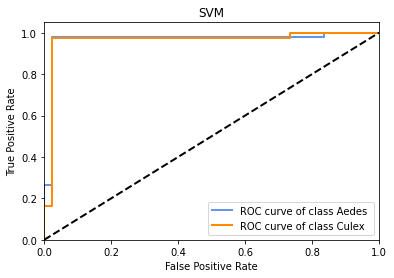

In [148]:
colors = ["cornflowerblue", "darkorange"]
classes = ['Aedes','Culex']

plt.figure()
lw = 2
for i in range(2):
    plt.plot(
        fpr[i],
        tpr[i],
        color=colors[i],
        lw=lw,
        label="ROC curve of class {0} ".format(classes[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM")
plt.legend(loc="lower right")
plt.show()

In [149]:
roc_auc

{0: 0.9648578811369509, 1: 0.9648578811369508}

In [150]:
# y_score
test_prediction_transform=le.transform(test_prediction)
print(y_test,'\n',test_prediction_transform)
# y_test

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [151]:
# y_test
# y_score

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test,test_prediction_transform)
print(confusion)

[[43  2]
 [ 1 42]]


In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
SPC = TN / float(TN+FP)
TPR = TP / float(TP+FN)
print('SPC = ', SPC, '\nTPR = ', TPR)

SPC =  0.9555555555555556 
TPR =  0.9767441860465116
